# LSTM Time Series - Stock Price Prediction
## Part 1 - Data Explanatory Analysis
This notebook focuses on examining the raw dataset containing daily historical prices of Google stocks. The goal is to identify a specific timeframe suitable for further analysis and prediction using LSTM.

> **INPUT**: The raw data file of all available stock prices of Google (Alphabet Inc.), as downloaded from its original source. <br/>
> **OUTPUT**: The extracted historical data of the targeted period for analysis, stored in an intermediary location for next steps.

### 1. INITIALIZATION

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

### 2. LOAD DATASET FILE

The dataset we are going to initially load and explore is the historical records of daily price details of Google (Alphabet Inc.) sourced from [Yahoo Finance](https://finance.yahoo.com/quote/GOOG).

At first, we load the complete dataset available spanning a period from 2004-08-19 up until the time of creating this script.

The main objective of loading the entire dataset is to choose a particular time frame for analysis.

In [2]:
# Prepare data file location and load the dataset
data_file_location = "..\\data\\raw\\"
data_file_name = "google_stock_price_full_tsla"
data_file_ext = "csv"

# Load data file
data = pd.read_csv(data_file_location + data_file_name + "." + data_file_ext)

In [3]:
# Check dataset shape
data.shape

(2514, 7)

In [4]:
# Check dataset head
data.head(10)

,Date,Close,Adj Close,Volume,Open,High,Low
0,12/26/2025,475.19,475.19,58780660,485.23,489.09,473.82
1,12/24/2025,485.40,485.40,41285430,488.48,490.90,476.80
2,12/23/2025,485.56,485.56,58223630,489.40,491.97,482.84
3,12/22/2025,488.73,488.73,86916070,489.88,498.83,485.33
4,12/19/2025,481.20,481.20,103305400,488.12,490.49,474.72
5,12/18/2025,483.37,483.37,95168450,478.16,490.86,473.12
6,12/17/2025,467.26,467.26,106490400,488.22,495.28,466.20
7,12/16/2025,489.88,489.88,107608100,472.21,491.50,465.83
8,12/15/2025,475.31,475.31,114542200,469.44,481.77,467.66
9,12/12/2025,458.96,458.96,95656750,448.09,463.01,441.67


In [5]:
# Check data types
data.dtypes

Date          object
Close        float64
Adj Close    float64
Volume         int64
Open         float64
High         float64
Low          float64
dtype: object

### 3. INITIAL DATA CLEANING

As we notice, the Date column is currently in a String format which requires conversion to proper Datetime format.

In [6]:
# Convert Date column to a valid Datetime format
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y") #.dt.strftime("%Y-%m-%d")


# Sort by Date (ascending)
data = data.sort_values("Date")

# Optional: Convert to YYYY-MM-DD format
#data["Date"] = data["Date"].dt.strftime("%Y-%m-%d")

print(data)


           Date   Close  Adj Close     Volume    Open    High     Low
2513 2015-12-29   15.81      15.81   36036552   15.34   15.85   15.30
2512 2015-12-30   15.87      15.87   55416692   15.77   16.24   15.71
2511 2015-12-31   16.00      16.00   40707235   15.90   16.23   15.89
2510 2016-01-04   14.89      14.89  102352599   15.38   15.43   14.60
2509 2016-01-05   14.90      14.90   47782851   15.09   15.13   14.67
...         ...     ...        ...        ...     ...     ...     ...
4    2025-12-19  481.20     481.20  103305400  488.12  490.49  474.72
3    2025-12-22  488.73     488.73   86916070  489.88  498.83  485.33
2    2025-12-23  485.56     485.56   58223630  489.40  491.97  482.84
1    2025-12-24  485.40     485.40   41285430  488.48  490.90  476.80
0    2025-12-26  475.19     475.19   58780660  485.23  489.09  473.82

[2514 rows x 7 columns]


In [7]:

print(data["Date"].head())
print(data["Date"].dtype)     # should be: datetime64[ns


2513   2015-12-29
2512   2015-12-30
2511   2015-12-31
2510   2016-01-04
2509   2016-01-05
Name: Date, dtype: datetime64[ns]
datetime64[ns]


In [8]:
# Check column format
data.dtypes

Date         datetime64[ns]
Close               float64
Adj Close           float64
Volume                int64
Open                float64
High                float64
Low                 float64
dtype: object

### 4. EXPLORE DATASET

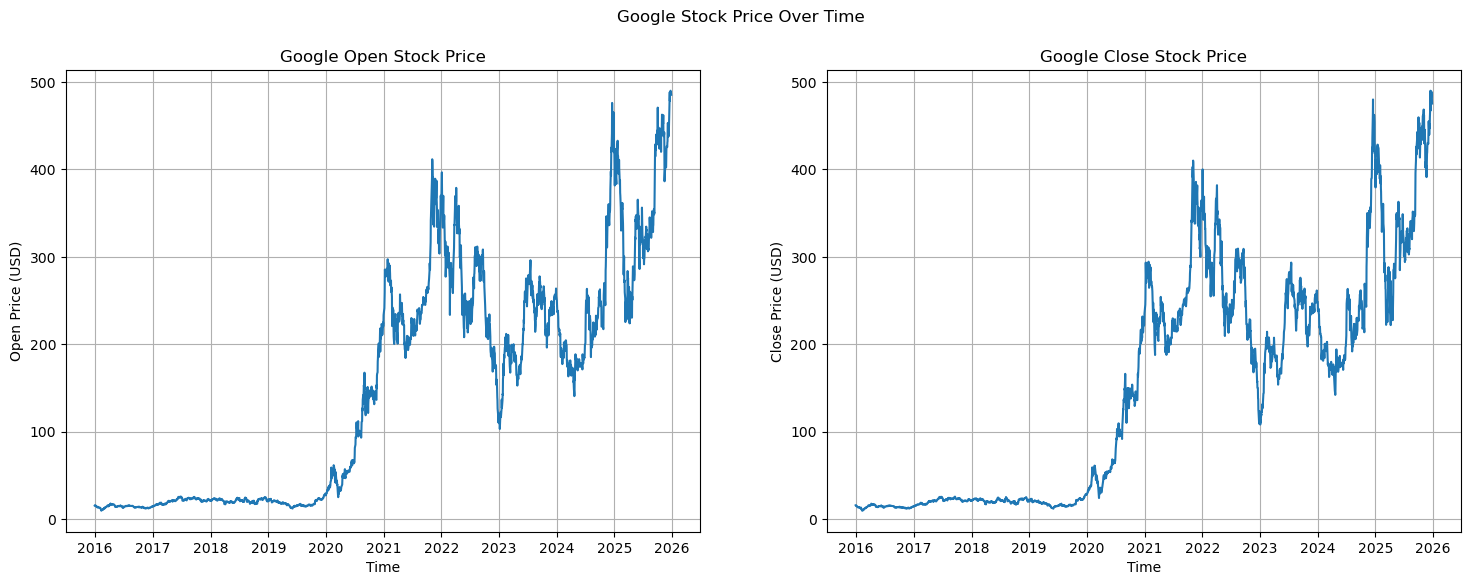

In [9]:
# Plot Open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("Google Open Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("Google Close Stock Price")
plt.grid()

plt.suptitle("Google Stock Price Over Time")
plt.show()

The previous charts show an inconsistent behavior in the stock's performance over time, with a completely distinct trend during the past five years.

This means that the old historical data might not be relevant to the predictions, since it's most likely to represents a different period with outdated indicators that don't affect the current trend.

Accordingly, we will concentrate our analysis on the most recent five-year data, as it is expected to provide more accurate insights for predicting future trends.

In [10]:
# Select stock price records for the last five years, starting from 2019
data_5years = data[data["Date"].dt.year >= 2022]

# Check filtered data shape
data_5years.shape

(1000, 7)

In [11]:
data_5years.head()

,Date,Close,Adj Close,Volume,Open,High,Low
999,2022-01-03,399.93,399.93,104686060,382.58,400.36,378.68
998,2022-01-04,383.20,383.20,100248280,396.52,402.67,374.35
997,2022-01-05,362.71,362.71,80119808,382.22,390.11,360.34
996,2022-01-06,354.90,354.90,90336489,359.00,362.67,340.17
995,2022-01-07,342.32,342.32,84164768,360.12,360.31,336.67


In [12]:
data_5years.dtypes

Date         datetime64[ns]
Close               float64
Adj Close           float64
Volume                int64
Open                float64
High                float64
Low                 float64
dtype: object

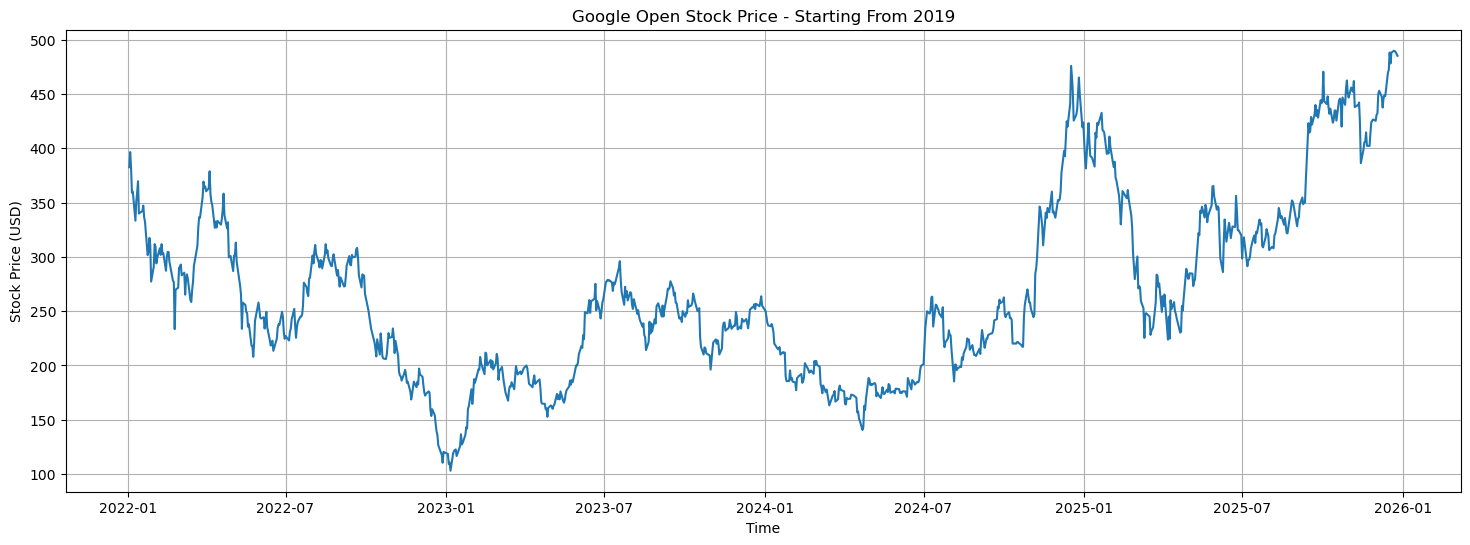

In [13]:
# Plot Open stock price performance in the last five years
plt.figure(figsize=(18,6))
plt.plot(data_5years["Date"], data_5years["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("Google Open Stock Price - Starting From 2019")
plt.grid()

The selected period seems to be more relevant for analysis, as it's more likely to drive the stock performance with the impact of other external factors.

### 5. STORE FILTERED DATASET

In [14]:
# Prepare data file location
data_file_location = "..//data//interim//"
data_file_name = "google_stock_price_recent_tsla"
data_file_ext = "csv"

# Store dataset
data_5years.to_csv(data_file_location + data_file_name + "." + data_file_ext, index=None)